# (Zomato data analysis project)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df = pd.read_csv("D:\Data science\Python_DA\Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [450]:
# Information on dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} Columns \n')
print('='*80)
print('The attrinutes and their unique values are as below\n')
for i in df.columns:
    print(f'========== {i} ==========')
    print(df[i].value_counts().sort_values(ascending=False))
    print('- -'*20)

The dataset has 148 rows and 7 Columns 

The attrinutes and their unique values are as below

========== name ==========
name
San Churro Cafe           2
Onesta                    2
CAFE NOVA                 2
McDonald's                1
Penthouse Cafe            1
                         ..
Swaada Healthy Kitchen    1
Gawdaru Mane Beriyani     1
Melting Melodies          1
New Indraprasta           1
Vijayalakshmi             1
Name: count, Length: 145, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
========== online_order ==========
online_order
No     90
Yes    58
Name: count, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
========== book_table ==========
book_table
No     140
Yes      8
Name: count, dtype: int64
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
========== rate ==========
rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
2.9     7
3.1     7
3.2     7
3.5   

In [245]:
# convert the data type of column - rate:
def Handle_Rate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(Handle_Rate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of Resturant:

In [278]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of Resturant :')

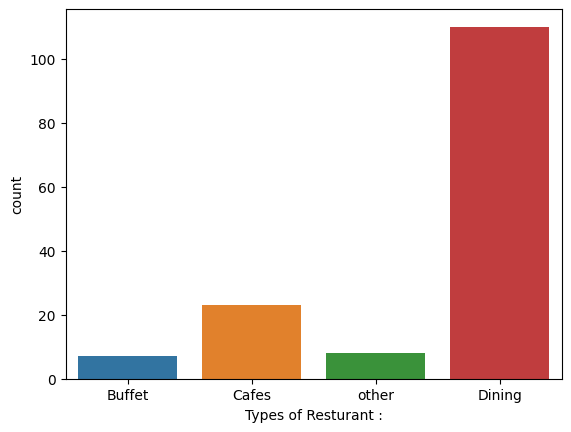

In [284]:
sns.countplot(df, x=df["listed_in(type)"], hue=df["listed_in(type)"])
plt.xlabel("Types of Resturant :")

### Conclusion - Majority of resturant falls in dinning category.

Text(0.5, 0, 'Online and offline order based on type of Resturant :')

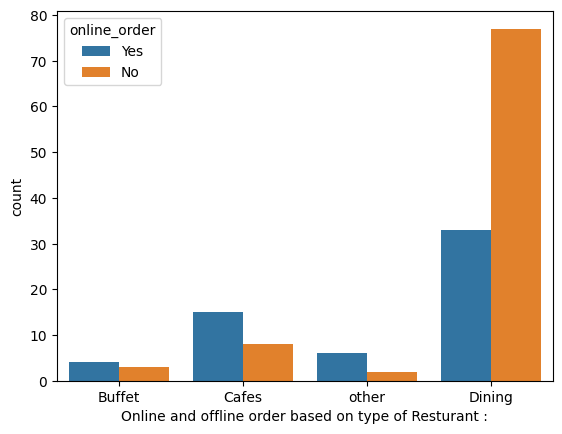

In [293]:
sns.countplot(df, x=df["listed_in(type)"], hue=df["online_order"])
plt.xlabel("Online and offline order based on type of Resturant :")

### Conclusion - Majority of resturant falls in dinning category gets Offline orders.

In [298]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

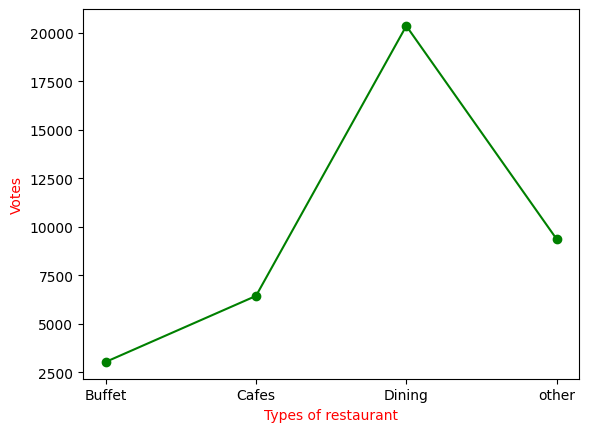

In [350]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({"votes": grouped_data})
plt.plot(result, c='green', marker="o",)
plt.xlabel("Types of restaurant", c='red', size=10)
plt.ylabel("Votes", c='red', size=10)

In [352]:
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


### conclusion - DInning resturants has recieved maximum votes.

<Axes: xlabel='rate', ylabel='Count'>

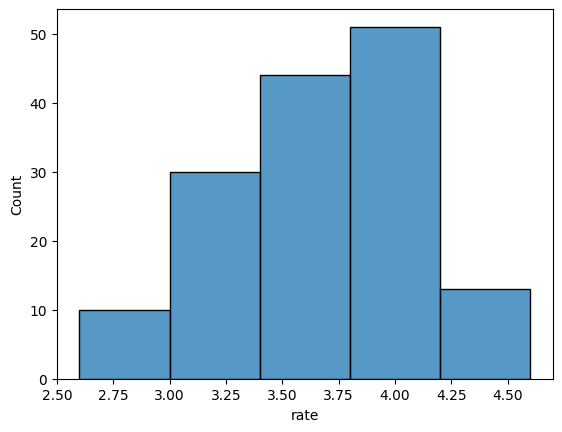

In [366]:
sns.histplot(df['rate'],bins=5)

### conclusion:- The majority resturants recieved ratings from 3.75 to 4.25.

## Average order spending by couples:

In [431]:
pd.DataFrame(df['approx_cost(for two people)'].value_counts())

,count
approx_cost(for two people),
300,23
200,16
150,16
400,15
500,14
600,13
800,12
100,6
450,6


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

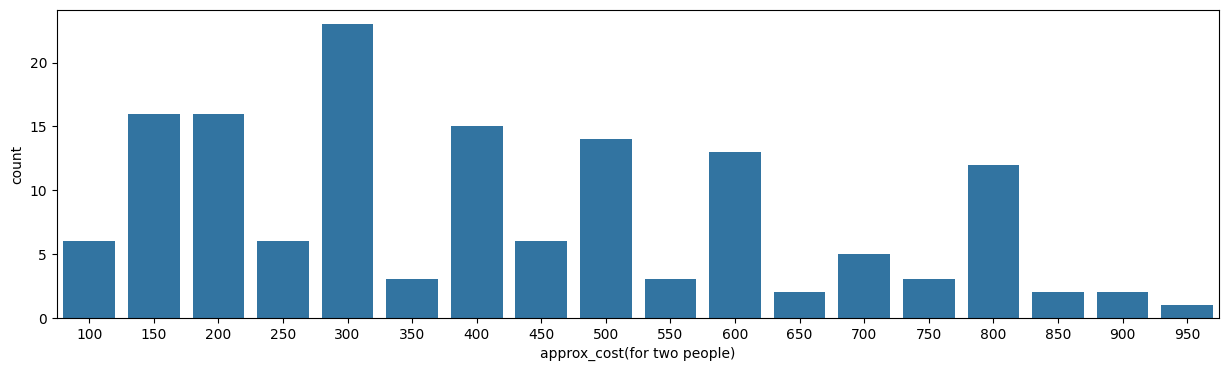

In [423]:
plt.figure(figsize=(15,4))
sns.countplot(x=df['approx_cost(for two people)'])

### Conclusion:- The Majority of couples would like to spend Rupees 300.

## Which mode receives maximum rating:

In [436]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

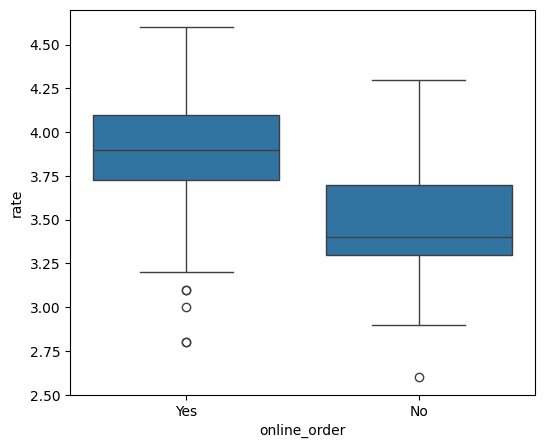

In [444]:
plt.figure(figsize=(6,5))
sns.boxplot(x=df['online_order'], y=df['rate'], data=df)

## conclusion:-  Offline order received lower rating in comparison to online order

In [452]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [461]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
pivot_table

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


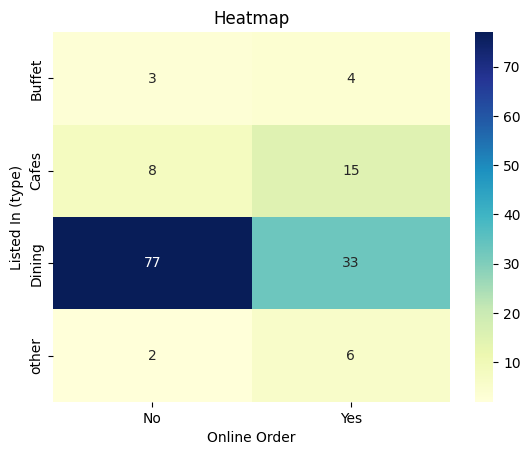

In [463]:
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (type)")
plt.show()

### Conclusion:- Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders. This suggest 
### that clients prefers orders in person at restaurants, but prefer online ordering at cafes.